In [14]:
import warnings
warnings.filterwarnings('ignore')
import os,time
import csv
import numpy as np
import ants
import subprocess as sp
from datetime import datetime
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec
PATH = os.getcwd()
print(PATH)
gpu_id = '2'



/raid/Aditya/Recon/github


In [ ]:
def Recon_CT1_3D(R_arr):
    model_dir=f'{PATH}/Weights/3D/'
    dir_recon = f'{PATH}/Test/3D/'
    csv_path =f'{PATH}/Demo_Data/csv/CT1_3D.csv'

    for R in R_arr:
        cmd = f"python3 {PATH}/Test/3D/test_CT1_3D_tf2.py --R {R} --K 5 --csv_path {csv_path} --model_dir={model_dir} --dir_recon {dir_recon}"
        sp.call(cmd,shell =True)


def Recon_T1_3D(R_arr):
    model_dir=f'{PATH}/Weights/3D/'
    dir_recon = f'{PATH}/Test/3D/'
    csv_path =f'{PATH}/Demo_Data/csv/T1_3D.csv'

    for R in R_arr:
        cmd = f"python3 {PATH}/Test/3D/test_T1_3D_tf2.py --R {R} --K 5 --csv_path {csv_path} --model_dir={model_dir} --dir_recon {dir_recon}"
        sp.call(cmd,shell =True)

def Recon_T2(R_arr):
    model_dir=f'{PATH}/Weights/2D/'
    dir_recon = f'{PATH}/Test/2D/'
    csv_path =f'{PATH}/Demo_Data/csv/T2.csv'

    for R in R_arr:
        cmd = f"python3 {PATH}/Test/2D/test_T2_2D_tf2.py --R {R} --K 10 --csv_path {csv_path} --model_dir={model_dir} --dir_recon {dir_recon}"
        sp.call(cmd,shell =True)


def Recon_FLAIR(R_arr):
    model_dir=f'{PATH}/Weights/2D/'
    dir_recon = f'{PATH}/Test/2D/'
    csv_path =f'{PATH}/Demo_Data/csv/FLAIR.csv'

    for R in R_arr:
        cmd = f"python3 {PATH}/Test/2D/test_FLAIR_2D_tf2.py --R {R} --K 10 --csv_path {csv_path} --model_dir={model_dir} --dir_recon {dir_recon}"
        sp.call(cmd,shell =True)


R_arr = [2,4,6,8,10,15]

# Recon_CT1_3D(R_arr)
# Recon_T1_3D(R_arr)
Recon_T2(R_arr)
Recon_FLAIR(R_arr)

In [10]:
csv_path = "Demo_Data/csv/cases.csv"

def getFileNames(csv_path):

    T1_names = []
    with open(csv_path, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            T1_names.append(row)
    return np.asarray(T1_names)


filenames = getFileNames(csv_path)


[['Demo_Data/311_502/20140903/']]


In [11]:
idx1 = 0
tstFilenames = filenames[idx1]
print(tstFilenames)
seq_file_paths_org = []
seq_file_paths_us = []
seq_file_paths_recon = []

seq_org = []
seq_us = []
seq_recon = []
spacing = []
R_ = [0,2,4,6,8,10,15]
seq_ =["T1","CT1","T2","FLAIR"]
for i in seq_:
    for j in R_:
        if j == 0:
            tmp = f"{tstFilenames[0]}{i}.nii.gz"
            seq_file_paths_org.append(tmp)
            tmp2 = ants.image_read(tmp,reorient=True)
            if tmp2.spacing[0] != tmp2.spacing[1]:
                tmp2 = ants.resample_image(tmp2,(1,1,1))
            seq_org.append(tmp2)
            spacing.append(tmp2.spacing)
        else:
            tmp = f"{tstFilenames[0]}recon/R{j}/{i}_us.nii.gz"
            if os.path.exists(tmp):
                seq_file_paths_us.append(tmp)
                tmp2 = ants.image_read(tmp,reorient=True)
                if tmp2.spacing[0] != tmp2.spacing[1]:
                    tmp2 = ants.resample_image(tmp2,(1,1,1))
                seq_us.append(tmp2)
            else:
                tmp2 = ants.image_read(tmp,reorient=True)
                if tmp2.spacing[0] != tmp2.spacing[1]:
                    tmp2 = ants.resample_image(tmp2,(1,1,1))
                seq_us.append(tmp2)
            tmp = f"{tstFilenames[0]}recon/R{j}/{i}_recon.nii.gz"
            seq_file_paths_recon.append(tmp)
            tmp2 = ants.image_read(tmp,reorient=True)
            if tmp2.spacing[0] != tmp2.spacing[1]:
                tmp2 = ants.resample_image(tmp2,(1,1,1))
            seq_recon.append(tmp2)





['Demo_Data/311_502/20140903/']
(1.2998809814453125, 1.0, 1.0)
(1.2998809814453125, 1.0, 1.0)
(0.625, 0.625, 4.9996795654296875)
(0.46875, 0.46875, 4.9996795654296875)


In [19]:
def show_images(org,us,recon,seq_,R_,idx2=20,idx2_1=20,idx = [0,0,0,0]):
    plt_1 = plt.figure(figsize=(40, 46))
    gs = gridspec.GridSpec(nrows=19, ncols=8,width_ratios=[1,0.17,1,1,1,1,1,1], height_ratios=[1,1,1,1,0.15,1,1,1,1,0.15,1,1,1,1,0.15,1,1,1,1])

    def plot(x,gs,i,j,k,xmin,xmax,ylabel="",title=""):
        x = np.rot90((x -xmin)/(xmax))
        a,b = x.shape
        if a >b:
            l = np.int(np.floor((a-b)/2))
            r = np.int(np.ceil((a-b)/2))
            x = np.pad(x,((0, 0),(l, r)), constant_values=(0,0))
        # plt.clf()
        ax =plt.subplot(gs[i:j,k])
        
        if ylabel !="":
            # print("printing ylabel")
            plt.ylabel(ylabel,fontsize=24)
        if title != "":
            plt.title(title,fontsize=24)
        plt.imshow(x,cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
 
    
    l = len(R_) - 1
    #Display the output images
    c = 0
    for i in range(len(seq_)):
    # for i in range(0,1):
        if idx[i] == 0:
            idx2_1 = int(np.floor(np.shape(org[i])[2]/2))
        else:
            idx2_1 = idx[i]
        for j in range(len(R_)):
            if R_[j] == 0:
                count = 0
                if i == 0:
                    title = f"R = {R_[j]} $\\times$"
                else:
                    title = ""
                x = np.abs(org[i][:,:,idx2_1])
                xmin = np.min(x)
                xmax = np.max(x)
                plot(x,gs,4*i+1 +c,4*i+3 +c,count,xmin,xmax,seq_[i],title)
                count=count+2
            else:
                # print(5*i+j-1)
                if i == 0:
                    title = f"R = {R_[j]} $\\times$"
                else:
                    title = ""
                if R_[j] == 2:
                    ylabel = "Undersampled"
                    
                else:
                    ylabel = ""
                x = np.abs(us[l*i+j-1][:,:,idx2_1])
                p = plot(x,gs,4*i +c,4*i+2 +c,count,xmin,xmax,ylabel,title)
                count=count+1
        
        for j in range(len(R_)):
                if R_[j] == 0:
                    count = 2
                else:
                    if R_[j] ==2:
                        ylabel = "Reconstructed"
                    else:
                        ylabel = ""
                    x = np.abs(recon[l*i+j-1][:,:,idx2_1])
                    p = plot(x,gs,4*i+2 +c,4*i+4 +c,count,xmin,xmax,ylabel)
                    count=count+1
        c = c+1        
    plt_1.subplots_adjust(wspace= .05,hspace= 0.05)
    plt_1.show()
    plt_1.savefig('Figure_Demo_300dpi.png', dpi=300,bbox_inches='tight')

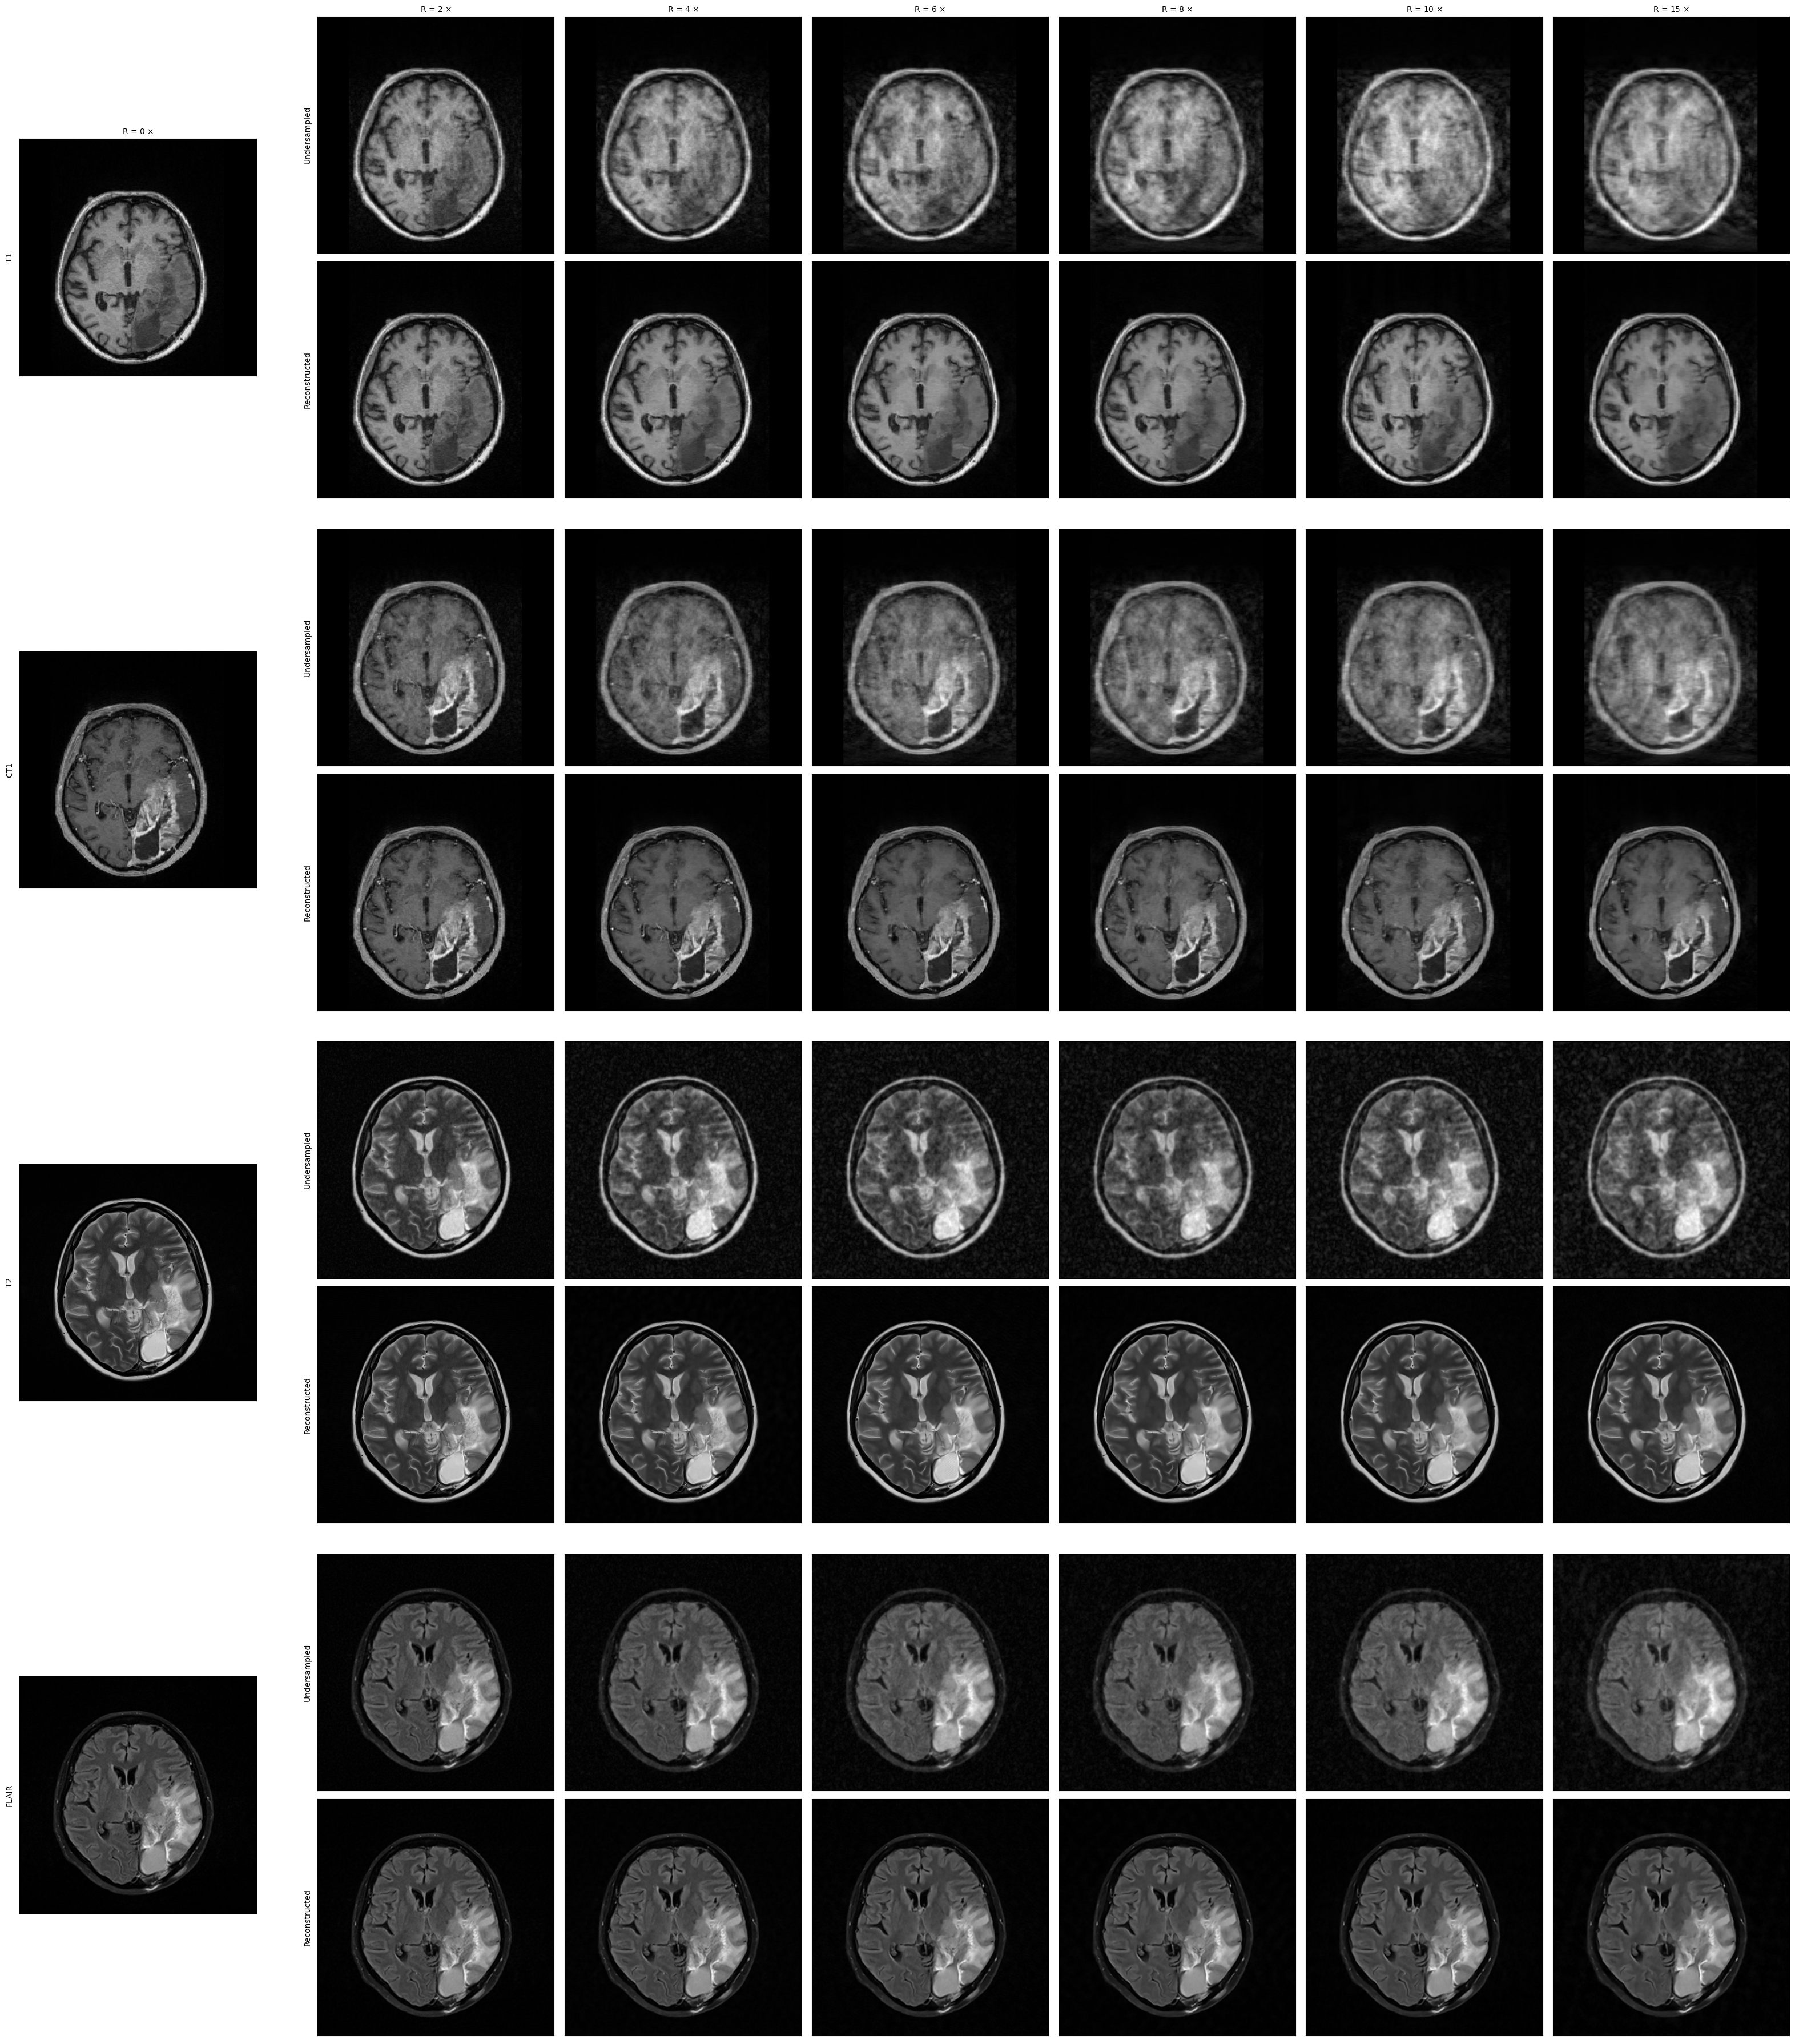

In [20]:
# Plot and save image
idx =[166,166,12,12]

show_images(seq_org,seq_us,seq_recon,seq_,R_,idx=idx)